# W01

## UBCF

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error   # (실제값 - 예측값) 제곱의 평균을 계산하는 함수
from datetime import datetime

### 데이터 읽기

In [2]:
movies = pd.read_csv('./data/movies.csv') # 영화 정보
ratings = pd.read_csv('./data/ratings.csv') # 사용자가 영화에 대해 남긴 평점 데이터
print(movies.shape)
print(ratings.shape)

(9724, 3)
(100836, 4)


### 데이터 살펴보기

In [3]:
movies.head()

,movieId,title,genres
0,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,Jumanji (1995),Adventure|Children|Fantasy
2,2,Grumpier Old Men (1995),Comedy|Romance
3,3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,Father of the Bride Part II (1995),Comedy


In [4]:
# 제목으로 영화 찾기
movies[movies.title.str.contains("Die", case = False)]

,movieId,title,genres
41,41,To Die For (1995),Comedy|Drama|Thriller
138,138,Die Hard: With a Vengeance (1995),Action|Crime|Thriller
321,321,"Wonderful, Horrible Life of Leni Riefenstahl, ...",Documentary
550,550,Eddie (1996),Comedy
793,793,Die Hard (1988),Action|Crime|Thriller
...,...,...,...
9157,9157,He Never Died (2015),Comedy|Drama|Horror
9184,9184,Eddie the Eagle (2016),Comedy
9249,9249,Texas - Doc Snyder hält die Welt in Atem (1993),Comedy|Western
9637,9637,Die Frauen von Ravensbrück (2005),Documentary


In [5]:
{j for i in movies.genres.str.split('|') for j in i}

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [6]:
# 평점 데이터 확인
ratings.head()

,userId,movieId,rating,timestamp
0,1,0,4.0,964982703
1,1,2,4.0,964981247
2,1,5,4.0,964982224
3,1,43,5.0,964983815
4,1,46,5.0,964982931


In [7]:
# timestamp는 초단위
pd.to_datetime(ratings.timestamp, unit = 's')

0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: timestamp, Length: 100836, dtype: datetime64[ns]

In [8]:
# 사용자 수와 사용자 당 평점 횟수
ratings.userId.nunique(), ratings.shape[0] / ratings.userId.nunique()

(610, 165.30491803278687)

In [9]:
# 평점행렬의 일부만 살펴보면, 평점 데이터가 일부 위치에만 존재하는 sparse 행렬임을 알 수 있음
ratings.pivot_table('rating', index = 'userId', columns = 'movieId').iloc[212:222, 808:817].fillna("")

movieId,808,809,810,811,812,813,814,815,816
userId,,,,,,,,,
213,,,,,,,,,
214,,4.0,,,,,,3.0,
215,,,,3.5,,,,,
216,,,,,,,,,3.0
217,,,,3.0,,,,3.0,2.0
218,,,,,,,,,
219,,,,,,,,2.5,
220,,,,,,,,,
221,,,,,,,,,4.0


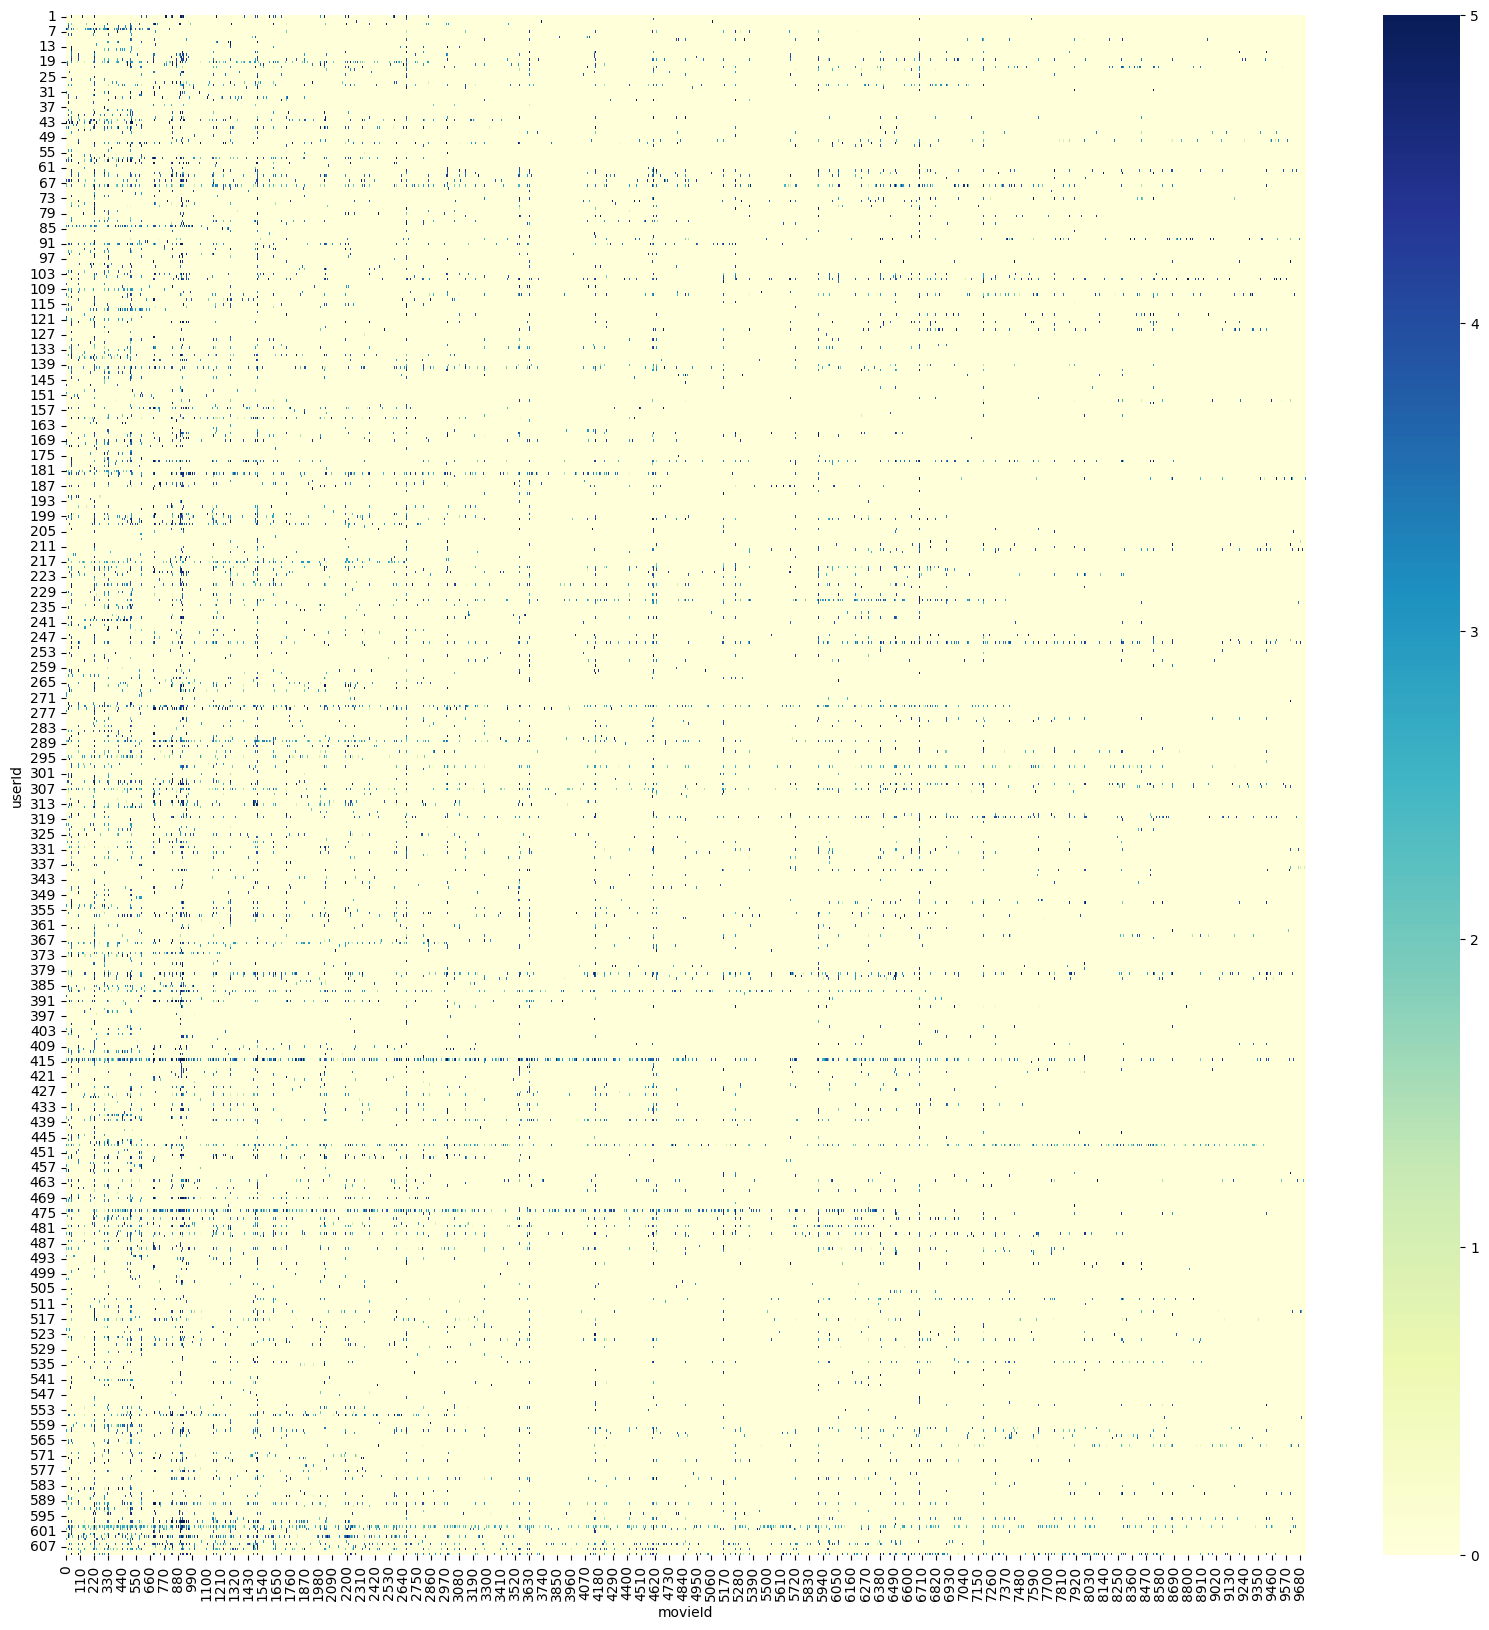

In [10]:
plt.figure(figsize = (20, 20))
df = ratings.pivot_table('rating', index = 'userId', columns = 'movieId', fill_value = 0)
sns.heatmap(df, cmap = 'YlGnBu')
plt.show()

In [11]:
# Density level (%)
density = ratings.shape[0] / (ratings.userId.nunique() * ratings.movieId.nunique())
f'{round(density * 100, 2)}%'

'1.7%'

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


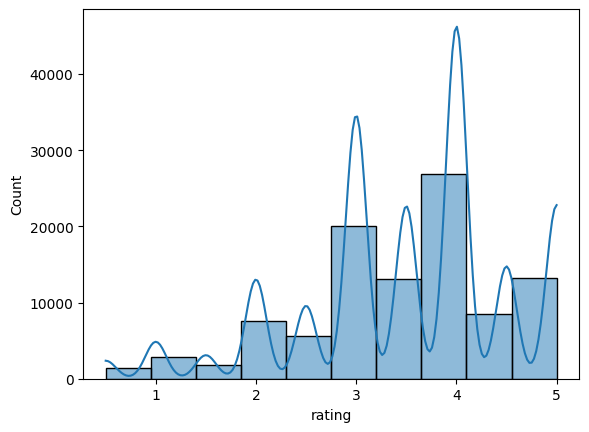

In [12]:
# 평점 분포
print(ratings.describe().rating)
sns.histplot(ratings.rating, bins = 10, kde = True)
plt.show()

### 나의 평점 입력하기

In [13]:
# 나의 사용자 ID
myId = 611

In [14]:
print("제시되는 영화에 대해 10개까지 평점(1~5점)을 입력하시기 바랍니다.")
print("잘 모르는 영화일 경우 평점을 낮게 주시거나 Enter키를 치시면 됩니다.")

movies_for_rating = pd.read_csv('data/movies_for_rating.csv')
my_ratings = []
count = 0

df = movies_for_rating.sample(frac=1)
for i in range(df.shape[0]):
    my_rating = input(f"{df.iloc[i].title}: ")
    try:
        score = int(my_rating)
        if score < 1 or score > 5:
            continue
        my_ratings.append((myId, df.iloc[i].movieId, score, int(datetime.now().timestamp())))
        count += 1
    except:
        continue
    if count >= 10:
        break

my_ratings = pd.DataFrame(my_ratings, columns=ratings.columns)
my_ratings.to_csv('my_ratings.csv', index=False)
print("\nMy rating summary:\n", my_ratings.merge(df)[['title', 'genre', 'rating']])

ratings = pd.concat([ratings, my_ratings]).reset_index(drop=True)

제시되는 영화에 대해 10개까지 평점(1~5점)을 입력하시기 바랍니다.
잘 모르는 영화일 경우 평점을 낮게 주시거나 Enter키를 치시면 됩니다.

My rating summary:
            title      genre  rating
0  Bottle Rocket      Crime       3
1     District 9     Sci-Fi       2
2      The Birds     Horror       1
3      GoldenEye     Action       3
4     Waterworld     Sci-Fi       4
5     Four Rooms     Comedy       2
6   Philadelphia      Drama       1
7      Boomerang    Romance       2
8    The Shining     Horror       5
9        Aladdin  Animation       5


### 추천 프로세스

### 입력데이터 구성: 평점행렬 만들기

In [15]:
# title컬럼을 얻기 위해 movies와 조인 수행
rating_movies = pd.merge(ratings, movies, on = 'movieId')

# 행은 userId, 열은 title로 pivoting 수행. rating이 없는 값(NaN)은 모두 0으로 변환
rating_matrix = rating_movies.pivot_table('rating', index = 'userId', columns = 'title', fill_value = 0)

print(rating_matrix.shape)
rating_matrix.head()

(611, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,4.0,0
2,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
3,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
4,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
5,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0


### 유사집단 탐색: 사용자 간 유사도 산출

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
# cosine_similarity()는 행을 기준으로 유사도를 계산
user_sim = cosine_similarity(rating_matrix, rating_matrix)

# cosine_similarity()로 반환된 numpy 행렬에 영화명을 매핑하기 위해 DataFrame으로 변환
user_sim = pd.DataFrame(user_sim, rating_matrix.index, rating_matrix.index)

print(user_sim.shape)
user_sim.head()

(611, 611)


userId,1,2,3,4,5,6,7,8,9,10,...,602,603,604,605,606,607,608,609,610,611
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321,0.022412
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427,0.000000
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119,0.000000
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683,0.036274
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792,0.080877


In [18]:
# 나와 유사도가 높은 상위 5명 리스트
user_sim.loc[myId].sort_values(ascending = False)[1:6]

userId
145    0.196360
498    0.187832
485    0.185336
347    0.183922
569    0.177943
Name: 611, dtype: float64

### 추천 상품 결정: 개인화된 영화 추천

#### 영화 평점 예측

In [19]:
# 유사도가 가장 높은 이웃의 수 설정
K = 20

In [21]:
%%time
# CPU time: CPU가 코드를 실행하는 데 걸린 시간(kernel time 등을 포함)
# Wall time: 실제 코드를 실행하는 데 걸린 시간(다른 작업에 영향을 받음)

# 위의 평점예측 수식을 아래와 같이 구현함
R, S = rating_matrix.values, user_sim.values

# 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
rating_pred = np.zeros(R.shape)

# 사용자-아이템 평점 행렬의 열 크기만큼 Loop 수행.
for u in range(R.shape[0]):
    # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 index 반환
    top_k = np.argsort(S[:, u])[::-1][1:K+1]
    # 개인화된 예측 평점을 계산
    for i in range(R.shape[1]):
        rating_pred[u, i] = S[u, :][top_k].dot(R[:,i][top_k].T)
        rating_pred[u, i] /= np.sum(np.abs(S[u, :][top_k]))

rating_pred = pd.DataFrame(rating_pred, rating_matrix.index, rating_matrix.columns)
rating_pred

CPU times: total: 48.8 s
Wall time: 48.9 s


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.761716,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.199473,0.000000,0.000000,0.689137,0.000000
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.140703,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.21164,0.0,0.0,0.0,0.767511,0.00000,0.000000,0.000000,...,0.000000,0.139740,0.000000,0.000000,0.0,0.229173,0.000000,0.000000,0.810881,0.059676
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.048357,0.14507,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.847966,0.000000,0.000000,0.672517,0.000000
5,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,0.0,0.0,0.00000,0.0,0.0,0.0,0.645987,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.645925,0.164652,0.000000,0.427383,0.000000
608,0.0,0.0,0.00000,0.0,0.0,0.0,0.498297,0.00000,0.529341,0.276509,...,0.000000,0.425780,0.139827,0.139827,0.0,0.984341,1.022557,0.110134,0.744544,0.000000
609,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


### Top-N 영화 추천

In [22]:
# 추천 영화의 수 (Top-K) & 추천 대상 설정
N = 10
uid = myId

In [23]:
# 내가 좋아하는 영화
like_movies = ratings.query('userId == @uid and rating >= 4').movieId
movies.query('movieId in @like_movies')

,movieId,title,genres
176,176,Waterworld (1995),Action|Adventure|Sci-Fi
506,506,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
9633,9633,The Shining (1997),Drama|Horror|Thriller


In [25]:
# id로 지정된 사용자의 모든 영화정보 추출하여 Series로 반환함
# 반환된 user_rating은 영화명(title)을 index로 가지는 Series 객체임
user_rating = rating_matrix.loc[uid,:]

# user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list로 만듬
already_seen = user_rating[user_rating > 0].index.tolist()

# list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함
unseen_list = [movie for movie in rating_matrix.columns.tolist() if movie not in already_seen]

# unseen_list에서 가장 평점이 높은 N개의 영화를 추천함
recomm_items = rating_pred.loc[uid, unseen_list].sort_values(ascending=False)[:N]
list(recomm_items.index)

['Dances with Wolves (1990)',
 'Braveheart (1995)',
 'Forrest Gump (1994)',
 'True Lies (1994)',
 'Pulp Fiction (1994)',
 'Crimson Tide (1995)',
 'Batman (1989)',
 'Die Hard: With a Vengeance (1995)',
 'Apollo 13 (1995)',
 'Clear and Present Danger (1994)']

### 추천성능 평가

In [27]:
# 사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 RMSE를 구함
actual, pred = rating_matrix.values, rating_pred.values
pred = pred[actual.nonzero()].flatten()
actual = actual[actual.nonzero()].flatten()
rmse = np.sqrt(mean_squared_error(pred, actual))
print(f'RMSE:', rmse)

RMSE: 2.523907424604893
